In [310]:
import matplotlib.pyplot as plt

In [365]:
class GameOfLife(object):  
    
    def __init__(self, x_dim, y_dim):
        # Initialize a 2D list with dimensions x_dim by y_dim filled with zeros.
        self.no_cols = x_dim
        self.no_rows = y_dim
        self.no_steps = 0
        self.grid = [[0 for col_num in range(x_dim)] for row_num in range(y_dim)]
        # Can toggle here to control printing or drawing grid
        self.print = True
        self.draw = True
        
    def increment_steps(self):
        self.no_steps+=1
    
    def get_grid(self):
        # Implement a getter method for your grid.
        return self.grid

    def print_grid(self):
        # Implement a method to print out your grid in a human-readable format.
        if not self.print:
            return 
        
        g = self.get_grid()
        print(f"\n\nStep {self.no_steps}")
        for row_num in reversed(g):
            print(*row_num, sep=" | ")
            print(f"{'---- ' * (self.no_cols-1)}")

    def populate_grid(self, coord):
        # Given a list of 2D coordinates (represented as tuples/lists with 2 elements each),
        # set the corresponding elements in your grid to 1.
        for pair in coord:
            x = pair[0] 
            y = pair[1]
            self.grid[x][y] = 1
            
        self.increment_steps()
        self.print_grid()
        self.draw_grid()
            
    def make_step(self):
        # Implement the logic to update the game state according to the rules of Conway's Game of Life.
        g = self.get_grid()
        
        # We'll copy the results of turning alive or dead into a separate list before overwriting the game state
        next_state = [[None for col_num in range(self.no_cols)] for row_num in range(self.no_rows)]
        
        # This checks a grid around a cell starting directly to the left and moving clockwise.
        # This also returns 0 if the index during that 8-direction check is out of bounds for the grid size.
        for row_num in range(self.no_rows):
            for col_num in range(self.no_cols):
                no_alive_neighbors = sum([
                    g[row_num][col_num-1] if 0 <= row_num < self.no_rows and 0 <= col_num-1 < self.no_cols else 0,
                    g[row_num-1][col_num-1] if 0 <= row_num-1 < self.no_rows and 0 <= col_num-1 < self.no_cols else 0,
                    g[row_num-1][col_num] if 0 <= row_num-1 < self.no_rows and 0 <= col_num < self.no_cols else 0,
                    g[row_num-1][col_num+1] if 0 <= row_num-1 < self.no_rows and 0 <= col_num+1 < self.no_cols else 0,
                    g[row_num][col_num+1] if 0 <= row_num < self.no_rows and 0 <= col_num+1 < self.no_cols else 0,
                    g[row_num+1][col_num+1] if 0 <= row_num+1 < self.no_rows and 0 <= col_num+1 < self.no_cols else 0,
                    g[row_num+1][col_num] if 0 <= row_num+1 < self.no_rows and 0 <= col_num < self.no_cols else 0,
                    g[row_num+1][col_num-1] if 0 <= row_num+1 < self.no_rows and 0 <= col_num-1 < self.no_cols else 0
                ])

                # Logic for turning alive and not alive
                #
                # If cell is alive and has two or three live neighbors, then it survives
                #
                # If cell is not alive, then it only becomes alive if it has exactly three live neighbors
                next_state[row_num][col_num] = 1 if (
                        (g[row_num][col_num] == 1 and no_alive_neighbors in [2, 3]) 
                        or (g[row_num][col_num] == 0 and no_alive_neighbors == 3)
                ) else 0
                    
        self.grid = next_state 
        self.increment_steps()
        self.print_grid()
        self.draw_grid()

    def make_n_steps(self, n):
        # Implement a method that applies the make_step method n times.
        for step in range(n):
            self.make_step()

    def draw_grid(self):
        # Draw the current state of the grid.
        if not self.draw:
            return
        
        g = self.get_grid()

        alive = []
        dead = []
        for row in range(game.no_rows):
            for col in range(game.no_cols):
                if g[row][col] == 1:
                    alive.append((col, row))
                if g[row][col] == 0:
                    dead.append((col, row))
                    
        xy_alive = list(zip(*alive))
        xs_alive = xy_alive[0]
        ys_alive = xy_alive[1]
        
        xy_dead = list(zip(*dead))
        xs_dead = xy_dead[0]
        ys_dead = xy_dead[1]
        
        plt.scatter(
            xs_alive, 
            ys_alive, 
            color = "blue",
            label = "alive"
        )
        plt.scatter(
            xs_dead, 
            ys_dead, 
            color = "orange",
            label = "dead"
        )
        plt.xlim([-1, self.no_cols])
        plt.ylim([-1, self.no_rows])
        
        plt.grid()
        # Hide outer axes to draw attention to game pieces
        plt.tick_params(
            axis = "x", 
            which = "both", 
            bottom = False, 
            top = False, 
            labelbottom = False
        )
        plt.tick_params(
            axis = "y", 
            which = "both", 
            left = False, 
            right = False, 
            labelleft = False
            )
        for pos in ["left", "top", "right", "bottom"]:
            plt.gca().spines[pos].set_visible(False)
        
        plt.title(
            f"Step {self.no_steps}",
            loc = "right"
        )
        # Move legend to the right of the plot
        plt.legend(
            bbox_to_anchor = (1.3,1),
            loc = "upper right"
        )
        
        plt.show()



Step 1
0 | 0 | 0 | 0 | 0
---- ---- ---- ---- 
0 | 0 | 0 | 1 | 1
---- ---- ---- ---- 
0 | 0 | 1 | 1 | 0
---- ---- ---- ---- 
0 | 0 | 0 | 1 | 0
---- ---- ---- ---- 
1 | 0 | 0 | 0 | 0
---- ---- ---- ---- 
0 | 0 | 0 | 0 | 0
---- ---- ---- ---- 


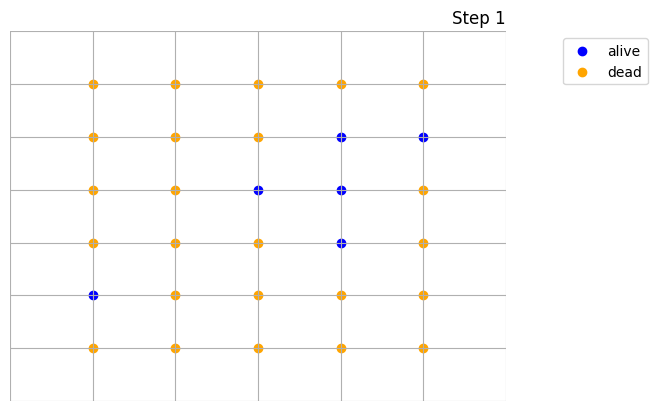



Step 2
0 | 0 | 0 | 0 | 0
---- ---- ---- ---- 
0 | 0 | 1 | 1 | 1
---- ---- ---- ---- 
0 | 0 | 1 | 0 | 0
---- ---- ---- ---- 
0 | 0 | 1 | 1 | 0
---- ---- ---- ---- 
0 | 0 | 0 | 0 | 0
---- ---- ---- ---- 
0 | 0 | 0 | 0 | 0
---- ---- ---- ---- 


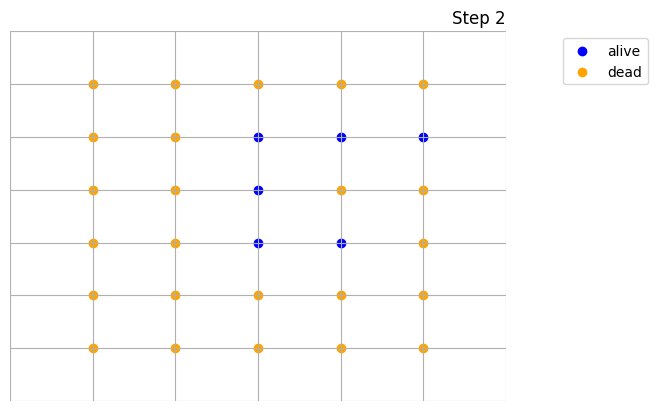



Step 3
0 | 0 | 0 | 1 | 0
---- ---- ---- ---- 
0 | 0 | 1 | 1 | 0
---- ---- ---- ---- 
0 | 1 | 0 | 0 | 1
---- ---- ---- ---- 
0 | 0 | 1 | 1 | 0
---- ---- ---- ---- 
0 | 0 | 0 | 0 | 0
---- ---- ---- ---- 
0 | 0 | 0 | 0 | 0
---- ---- ---- ---- 


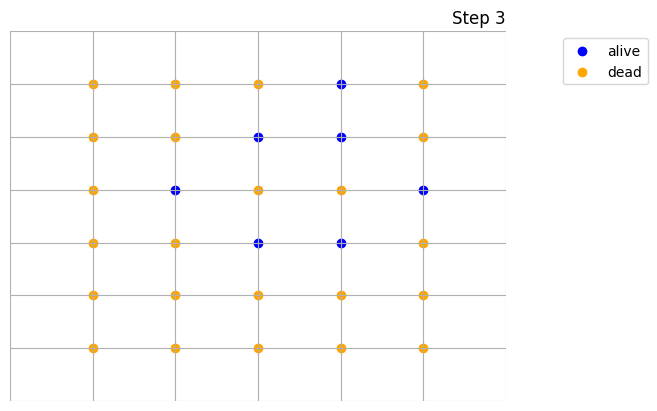



Step 4
0 | 0 | 1 | 1 | 0
---- ---- ---- ---- 
0 | 0 | 1 | 1 | 1
---- ---- ---- ---- 
0 | 1 | 0 | 0 | 1
---- ---- ---- ---- 
0 | 0 | 1 | 1 | 0
---- ---- ---- ---- 
0 | 0 | 0 | 0 | 0
---- ---- ---- ---- 
0 | 0 | 0 | 0 | 0
---- ---- ---- ---- 


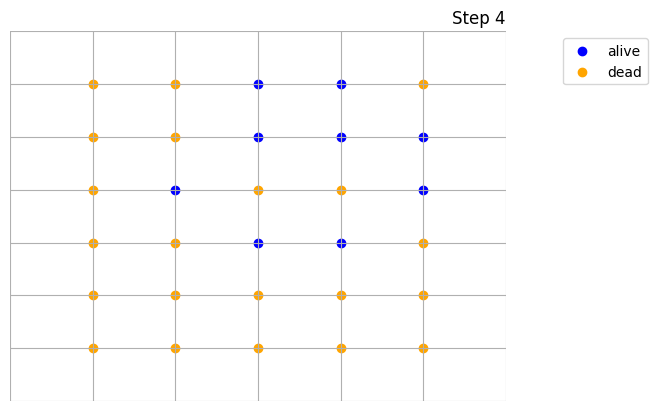



Step 5
0 | 0 | 1 | 0 | 1
---- ---- ---- ---- 
0 | 1 | 0 | 0 | 1
---- ---- ---- ---- 
0 | 1 | 0 | 0 | 1
---- ---- ---- ---- 
0 | 0 | 1 | 1 | 0
---- ---- ---- ---- 
0 | 0 | 0 | 0 | 0
---- ---- ---- ---- 
0 | 0 | 0 | 0 | 0
---- ---- ---- ---- 


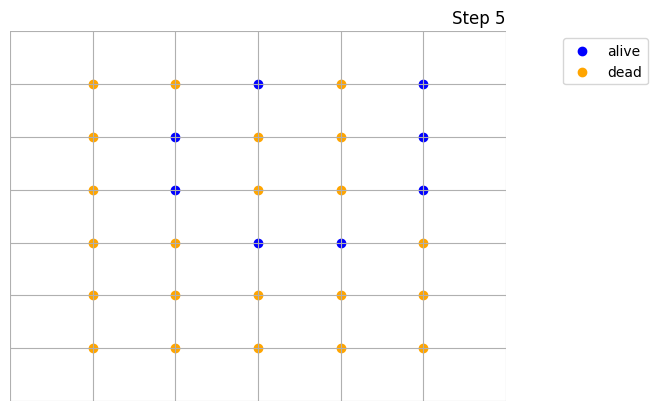



Step 6
0 | 0 | 0 | 1 | 0
---- ---- ---- ---- 
0 | 1 | 1 | 0 | 1
---- ---- ---- ---- 
0 | 1 | 0 | 0 | 1
---- ---- ---- ---- 
0 | 0 | 1 | 1 | 0
---- ---- ---- ---- 
0 | 0 | 0 | 0 | 0
---- ---- ---- ---- 
0 | 0 | 0 | 0 | 0
---- ---- ---- ---- 


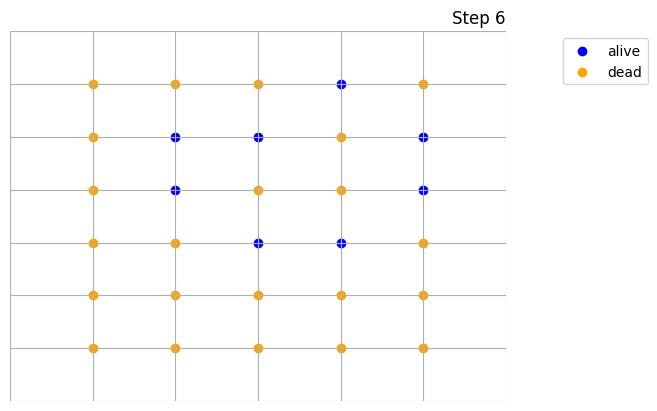

In [366]:
# We'll check that running multiple steps works as expected and matches the grid just above
game = GameOfLife(5, 6)
game.populate_grid([
    (2,3)
    , (1,0)
    , (3,3)
    , (3,2)
    , (4,4)
    , (4,3)
])
game.make_n_steps(5)